# Introduction

The Boston House Prices Dataset contains data on 506 towns in Boston. The dataset has 14 attributes such as the crime rate per town, parent teacher ratio and the median value of owner-occupied homes. The dataset was created in 1978 by Harrison, D. and Rubinfeld, D.L. The dataset can be downloaded from [Boston Housing Data](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data). The dataset doesn't contain the column names but these are contained in the .names file from [Boston Housing Names](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). The original paper which published the dataset can be found [here]( http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf). 

The dataset is comprised of data obtained from the 1970 Boston Standard Metropolitan Statistical Area census. [[1](#[1])]

The census from which the dataset was built can be viewed [here](https://www2.census.gov/library/publications/decennial/1970/phc-1/39204513p3ch06.pdf)

This project will start off by describing the the dataset: visualising the correlations between attributes, the distribution of the values for each attribute, and giving the summary statisitcs.

Next we will look at wether Inferential Statistics can be used to determine if there is a difference in median house prices for house along the Charles River vs those that are not along the Charles River.

Finally we will try to predict using a neural network, the median house price when given the values for the other attributes.

# Describe

In [1]:
# Import package that will enable opening of names file from url
from urllib.request import urlopen

# Open the names file and assign it to data
data = urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names")

# Adapted from https://bugs.python.org/issue5419
# Decode the content of the names file and print the output
print(data.read().decode('utf-8'))

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [2]:
# Importing pandas
import pandas as pd

# Reading the tab-delimited dataset into a DataFile and adding column names from the housing.names file shown above
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep='\s+', names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

# Viewing the first five rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualising the dataset

### Scatter plots

MEDV is the variable that we will be trying to predict using the keras machine learning library.

From the scatter plot below, there appears to be a negative correlation with house prices and the following: CRIM, INDUS, NOX, LSTAT, PTRATIO and possibly TAX.

There appears to be a positive correlation between house prices and RM

<Figure size 432x288 with 0 Axes>

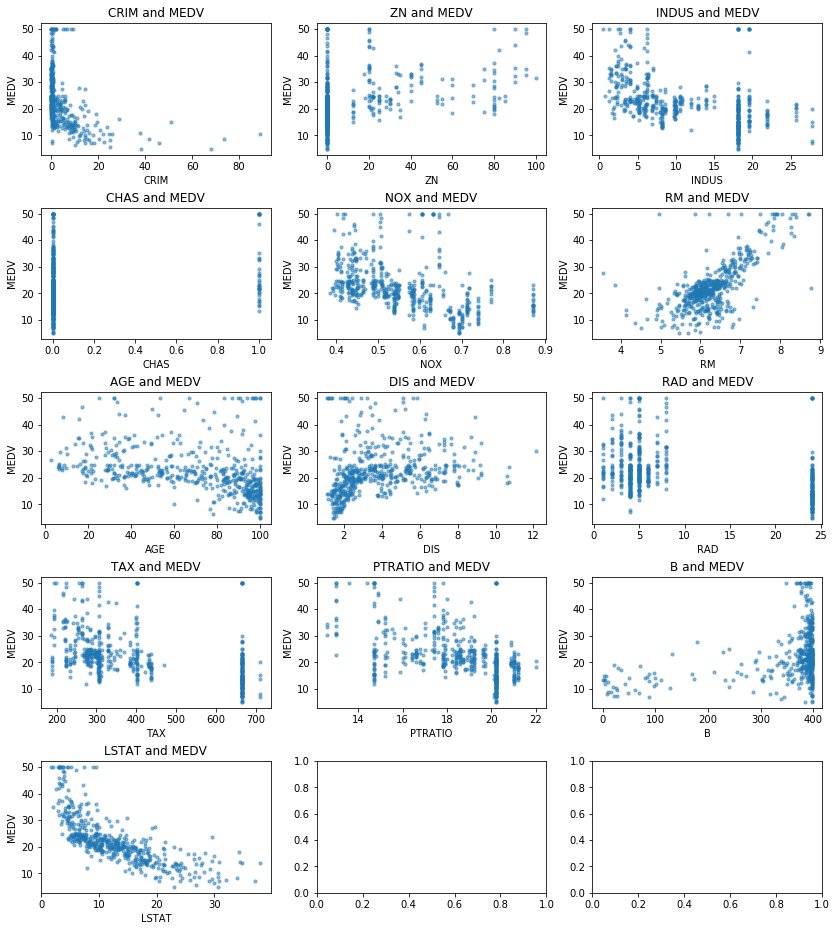

In [3]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
# Importing visualisation package matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Creat the figures
plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

# Determine the number of columns in the dataframe
cols = len(df.columns)

# Loop through the colmuns
for i in range(cols - 1):
    # Each row will contain 3 plots 
    row, col = i // 3, i % 3
    # Create the scatter plots for each attribute against MEDV
    axes[row][col].scatter(df.iloc[:, i], df.loc[:, "MEDV"], alpha=0.5, s=10)
    axes[row][col].set_title(df.columns[i] + ' and MEDV')
    axes[row][col].set_xlabel(df.columns[i])        
    axes[row][col].set_ylabel('MEDV')

# Show the plots
plt.show()

### Creating a diagonal correlation heat map

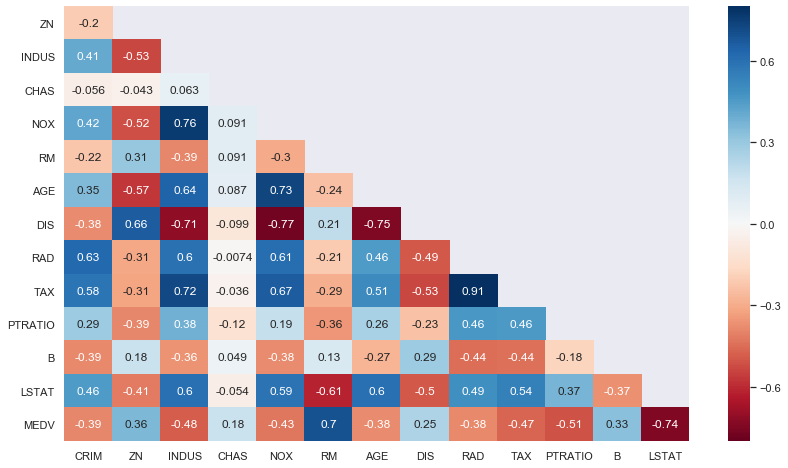

In [4]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a correlation matrix
corr = df.corr()

# Setting the size of the heat map
sns.set(rc={'figure.figsize':(14,8)})

# Adapted from https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

# Creating the correlation heatmap
sns.heatmap(corr, annot=True, mask=mask,cmap='RdBu', vmin=-0.8, vmax=0.8)


# Adapted from https://github.com/mwaskom/seaborn/issues/1773
# Altered to fix blank row at top and at the right

# Changes to the y-axis
b, t= plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t += 0.5 # Add 0.5 to the top
plt.ylim(b, t) # update the ylim(bottom, top) values

# Changes to the x-axis
l, r = plt.xlim()
r -= 1 # Subtract 1 from the right
plt.xlim(l, r)

# Showing the heatmap
plt.show()

### Deciding which variables to look at

From the above the variables that strongly correlate with MEDV (either positively or negatively) are LSTAT (-0.74), PTRATIO (-0.51) and RM (0.70). The highest correlation between any two variables is 0.91 for RAD vs TAX. The lowest correlation between any two variables is -0.0075 for RAD vs CHAS. When comparing one variable against all other variables, the CHAS variable has the lowest correlation. The highest correlation between CHAS and any other variable is with MEDV at 0.18. In the next section we will look at using inferential statistics to determine if there is a significant difference in house prices between houses that are along the Charles River and those that aren't.

In the prediction section, I initially chose the variables that had the highest correlation to MEDV but then I found that I was able to get a much better result by using all the variables.

### Summary statistics

In [5]:
# Provide summary statistics on the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Histograms

From the histogram below we can see that the majority of towns (~400) have a crime rate of less than 4 per capita. From the summary statistics we can see that 75% of towns have a crime rate per capita of 3.7 but the mean is also close to this value at 3.6. This is due to a maximum value of 88.9 which is resulting in a right skew. The standard deviation for this is 8.6. 

For the B variable the opposite is true. From the histogram we can see that the majority (close to 400) are at the high end of the scale with a value greater than 375. From the summary stats we can see that the Q1 value is 375.4, the max is 396.9 and the minimum is 0.32. The mean (356.7) is close to the Q1 value (375.4). This attribute has a left skew.



These differences, along with the differences in correlations above, are important to note for later on when we try to fit the data to the neural network. Preprocessing the data to remove the correlations, create a zero mean and standard deviation of 1 will improve the performance of the neural network.

<Figure size 432x288 with 0 Axes>

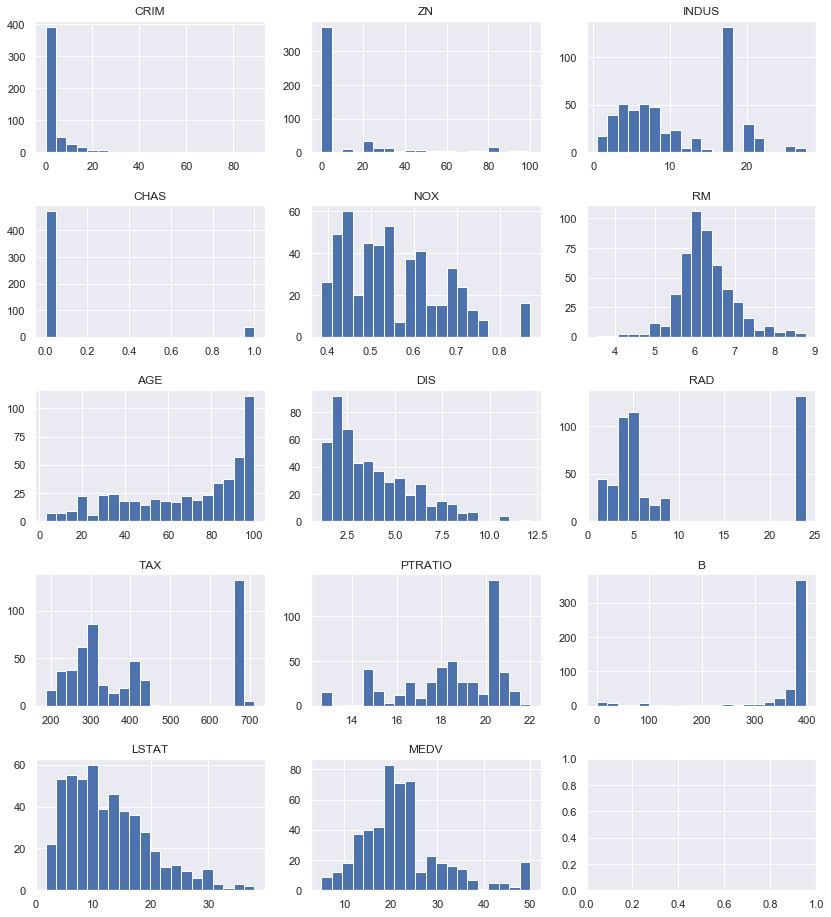

In [6]:
# Adapted from https://github.com/Tsmith5151/Boston-Housing-Prices/blob/master/boston_housing.ipynb
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
fig,axes = plt.subplots(5, 3, figsize=(14, 16))
fig.subplots_adjust(wspace=.2, hspace=.4)
img_index = 0

# Determine the number of columns in the dataframe
cols = len(df.columns)

# Loop through the colmuns
for i in range(cols ):
    # Each row will contain 3 plots
    row, col = i // 3, i % 3
    # Create the histograms for each attribute
    axes[row][col].hist(df.iloc[:, i], bins=20)
    axes[row][col].set_title(df.columns[i])
plt.show()

## Inferential Statistics

We are interested in determining if there is a significant difference in house prices between houses that are along the Charles River and those that aren't. The Boston House Prices dataset does not contain the data for the entire population of houses in Boston but instead contains a sample which are the median values for each town. We can use inferential statistics to make inferences about the population from the sample data.[[2](#[2])] Inferential statistics can be used to determine the probability that there is a true relationship between two variables.[[3](#[3])]  

In [7]:
# Determining the mean for both groups
df["MEDV"].groupby(df["CHAS"]).mean()

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

We can see that there is a difference in the means between the two groups. A t-test can be used to  determine if this difference is statistically significant. [[4](#[4])]

### Selecting an appropriate test

#### Student t-test

The Student t-test was developed by William Sealy Gosset in 1908, while he was working for the Guinness brewery.[[5](#[5])] As the test was designed as an economical way to monitor the quality of stout, there was a fear that it could be used by Guinnesses competitors so the work was published under the pseudonym "Student".[[5](#[5])]

There will be only one comparison made here: MEDV for CHAS = 0 and MEDV for CHAS = 1. As there is only one comparison to be made an ANOVA isn't necessary in this case and a t-test will be sufficient.

We need to decide if a dependent or an independent t-test should be used. A dependent samples t-test is used when each entry is present in both samples.[[6](#[6])] As the towns that tract the Charles River are different to the towns that don't, then an independent Student t-test should be used here.

For an independent Student t-test the samples should be of equal size and have the same variance.[[7](#[7])] In this case, as can be seen from below, the sample sizes are unequal with 471 and 35, and variances of 78.0 and 140.0, for those not along the Charles river and those along it respectively. Therefore, in this case a Student t-test is not appropriate.

In [8]:
# Determining the count for both groups
df["MEDV"].groupby(df["CHAS"]).count()

CHAS
0    471
1     35
Name: MEDV, dtype: int64

In [9]:
# Determining the variance for both groups
df["MEDV"].groupby(df["CHAS"]).var()

CHAS
0     77.992962
1    139.633059
Name: MEDV, dtype: float64

In [10]:
# Determining the standard deviation for both groups
df["MEDV"].groupby(df["CHAS"]).std()

CHAS
0     8.831362
1    11.816643
Name: MEDV, dtype: float64

#### Welch's t-test

Benard Lewis Welch developed an adaption of the Student t-test. Welch's t-test can be used in place of the Student t-test where the variance and/or sample sizes differ.[[8](#[8])]

A requirement for both the Student t-test and the Welch t-test is that the distributions must be normal.[[8](#[8])] However, as seen below, the distributions are not normal and therefore a Welch's t-test is not appropriate here either.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

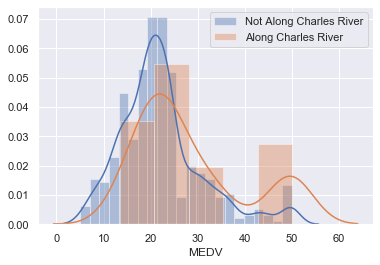

In [11]:
# Importing seaborn to create distplots
import seaborn as sns

# Creating distplots 
sns.distplot(df["MEDV"][df["CHAS"] == 0], label="Not Along Charles River")
sns.distplot(df["MEDV"][df["CHAS"] == 1], label="Along Charles River")

# Plotting legends
plt.legend()

# Showing the plot
plt.show

From the above it looks like they may be normally distributed, except for the large number of entries for a MEDV of 50. The values above 50 may have been capped.[[9](#[9])] The census from which the dataset is composed has values above 50 recorded as 50+ so this may be so. We can use the [Shapiro-Wilk test](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.shapiro.html) for normality which is provided by the [SciPy package](https://docs.scipy.org/doc/), to test if these are normally distributed.

In [12]:
# Importing stats module from scipy
from scipy import stats

# Selecting the Median Value of houses along the Charles River
alongCharlesRiver = df["MEDV"][df["CHAS"] == 1]

# Determining if the distribution for tracts along Charles River are normal
testStat, pValue = stats.shapiro(df["MEDV"][df["CHAS"] == 1])

pValue

0.00011230883683310822

In [13]:
# Selecting the Median Value of houses not along the Charles River
notAlongCharlesRiver = df["MEDV"][df["CHAS"] == 0]

# Determining if the distribution for tracts not along the Charles River are normal
testStat, pValue = stats.shapiro(notAlongCharlesRiver)

pValue

3.113930960958397e-14

The p-values above for both along and not along the Charles River are below 0.05, so we can reject the null hypothesis that the data is normally distributed. As these values may be affected by the MEDV 50.0 value. We can try to run the shapiro test again on the two subsets without the MEDV 50.0 value. As can be seen below, for those along the Charles River the p-value of 0.029 is still below 0.05 and therefore we again can reject the null hypothesis that the data is normally distributed.

In [14]:
testStat, pValue = stats.shapiro(alongCharlesRiver[df["MEDV"] != 50.0])

pValue

0.028505902737379074

In [15]:
testStat, pValue = stats.shapiro(notAlongCharlesRiver[df["MEDV"] != 50.0])

pValue

5.540209957466402e-10

#### Mann-Whitney U test
As the data is not normally distributed a non-parametric test should be used.[[10](#[10])] The Mann-Whitney U test (or Wilcoxon rank-sum test) can be used for non-para-metric data to test for the difference between two independent variables.[[10](#[10])]

Although the Student t-test and Welch t-test aren't appropriate here, I've included them below to show how the values between these tests can vary.

### Student t-test

The p-value for the Student t-test is less than 0.05 and we can therefore reject the null hypothesis as there is a significant difference between the means

In [16]:
# Code for Student t-test
from scipy.stats import ttest_ind as tti

stti_stat, stti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=True)

stti_p

7.390623170519905e-05

### Welch t-test

The p-value for the Welch t-test is less than 0.05 and we can therefore reject the null hypothesis as there is a significant difference between the means

In [17]:
# Code for Welch t-test
from scipy.stats import ttest_ind as tti

wtti_stat, wtti_p = tti(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1], equal_var=False)

wtti_p

0.003567170098137517

### Mann-Whitney U test 

The p-value for the Mann-Whitney U test is less than 0.05 and we can therefore reject the null hypothesis as there is a significant difference between the means

In [18]:
# Code for Mann-Whitney U test
from scipy.stats import mannwhitneyu as mwu

mwu(df["MEDV"][df["CHAS"] == 0], df["MEDV"][df["CHAS"] == 1])

MannwhitneyuResult(statistic=5605.5, pvalue=0.0007908352505647487)

## Predicting the Median Value of Owner-Occupied Homes
This is a regression predictive modeling problem. Regression predictive modeling problems involve predicting a real-valued quantity.[[11](#[11])]

Here we will try to predict the median value of owner-occupied homes by providing the values to the remaining attributes of the dataset to a neural network developed using the [Keras](https://keras.io/) package. Keras is an open-source neural network package which can run on top of TensorFlow as well as other packages.[[12](#[12])]

![Neuron](https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png "Neuron")
[[13](#[13])]

Neural networks are alorgithms that are modelled on the human brain.[[14](#[14])] The human brain is composed of neurons which can recieve inputs via dendrites and can output signals via axon terminals.[[15](#[15])] Neural networks, when given a dataset to train on, can make predictions about that dataset.[[16](#[16])] In this example, we will train the neural network with the training dataset, then we will provide the test inputs and make predictions about what the outputs will be. We can then compare the predicted outputs against the test outputs. We can determine how much each predicted output varys from the test output by squaring the difference between these and then getting the mean of those values. That will give us the Mean Squared Error (MSE). The Root Mean Squared Error (RMSE) can then be got by getting the square root of the MSE. The performance of the neural network will be measured by the RMSE, with a small RMSE meaning that it is performing well.

![Neural Network](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png "Neural Network")
[[17](#[17])]

### Preparing the data for the neural network

Creating separate columns for true and false values for CHAS

In [19]:
# Adapted from course materials
# Importing numpy package
import numpy as np

# Creating true and false attributes for CHAS variable
df["CHAS_True"] = df["CHAS"]
df["CHAS_False"] = (df["CHAS"] == 0).astype(np.int)

Separating the data into the independent variables and the target variable 'MEDV'. Dropping the 'CHAS' variable from the input as this is included in the 'CHAS_True' and 'CHAS_False' variables created above

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CHAS_True,CHAS_False
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0,1


In [21]:
# Input/independent variables
X = df.drop(columns=["MEDV", "CHAS"])

# Output/dependent variable
y = df["MEDV"]

In [22]:
X.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0,1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0,1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0,1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0,1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0,1


In [23]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

#### Splitting datasets into random train and test subsets

Setting the test size to 33% of the dataset

In [24]:
# Importing train test split from sklearn
from sklearn.model_selection import train_test_split

# Splitting the output and input datasets into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [25]:
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
419,11.81230,0.0,18.10,0.718,6.824,76.5,1.7940,24,666.0,20.2,48.45,22.74,0,1
340,0.06151,0.0,5.19,0.515,5.968,58.5,4.8122,5,224.0,20.2,396.90,9.29,0,1
100,0.14866,0.0,8.56,0.520,6.727,79.9,2.7778,5,384.0,20.9,394.76,9.42,0,1
403,24.80170,0.0,18.10,0.693,5.349,96.0,1.7028,24,666.0,20.2,396.90,19.77,0,1
127,0.25915,0.0,21.89,0.624,5.693,96.0,1.7883,4,437.0,21.2,392.11,17.19,0,1


In [26]:
X_test.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
205,0.13642,0.0,10.59,0.489,5.891,22.3,3.9454,4,277.0,18.6,396.90,10.87,0,1
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04,0,1
313,0.26938,0.0,9.90,0.544,6.266,82.8,3.2628,4,304.0,18.4,393.39,7.90,0,1
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,0,1
137,0.35233,0.0,21.89,0.624,6.454,98.4,1.8498,4,437.0,21.2,394.08,14.59,0,1


In [27]:
y_train.head()

419     8.4
340    18.7
100    27.5
403     8.3
127    16.2
Name: MEDV, dtype: float64

In [28]:
y_test.head()

205    22.6
116    21.2
313    21.6
504    22.0
137    17.1
Name: MEDV, dtype: float64

### Defining the neural net

The input dimensions have been set to the number of columns in the input dataset. The first hidden layer is set at twice the input size. The next layer is equal in size to the input layer. The output has been set to 1. The whitened dataset above has been chosen based on further testing done below which appears to give the best result out of either the whitened/scaled/whitened and scaled datasets.

All layers are using the Rectified Linear Unit (ReLU) activation function. Other activation functions didn't appear to give as good a result but maybe different combinations of activation functions might have. The ReLU activation function produces a zero output for all negative inputs and a positive linear output for postive inputs. [[18](#[18])]

In [29]:
# Adapted from https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

# Importing packages
from keras.models import Sequential
from keras.layers import Dense

# Determining the size of the input
inputSize = len(X_train.columns)

# Defining the neural network
model = Sequential()
model.add(Dense(2*inputSize, input_dim=inputSize, activation='relu'))
model.add(Dense(inputSize, activation='relu'))
model.add(Dense(1, activation='relu'))

Using TensorFlow backend.


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


### Compiling the neural net

As this is a regression problem, a Regression Loss Function will be used. Setting this to a Mean Squared Error Loss function. The mean squared error (MSE) is the average of the squares of the difference between the predicted value and the true value.[[19](#[19])] The root mean squared error (RMSE) is the square root of this.[[20](#[20])]

In [31]:
# Compiling the neural net
model.compile(loss='mean_squared_error', optimizer='adam')

### Fitting the neural net to the training dataset

In [32]:
# Fitting the neural net
model.fit(X_train, y_train, epochs=150, batch_size=8, verbose=0)

### Predicting the output for test dataset

We can view both the predicted values and the test values to compare them.

In [33]:
# Predicting the median house prices for the whitened input dataset
y_predicted = model.predict(X_test)

# Convert the y_predicted array into a numpy array 
y_predictedNP = np.array(y_predicted)

# Transposing and rounding the predicted values dataset for easier viewing
y_predictedNP.T.round(1)

array([[24.6, 24.2, 25.8, 25.9, 25.2, 43.4, 20.9, 20.2, 24.3, 34.7, 30.7,
        16.1, 23. , 21.5, 20.1, 37. ,  9.4, 26.4, 23.7,  3.8, 24.3, 27.6,
        24.4, 27.3, 15.9, 34.8, 21.6, 28.7, 32.3, 20.9, 37.6, 11.7, 41.4,
        19.4, 26.7, 29.7, 26.6, 17.4, 38.2, 25.4, 26.7, 23.5, 27.6,  0. ,
        28.2, 25. , 27.6, 16.8, 23.8, 25.2, 22.6, 25.1, 17.6, 10.3, 23.2,
         7.7, 26. , 43.9, 31.1, 13.9, 34.5, 19.6, 17.2, 13.8, 30.9, 21. ,
        38.2, 16.8, 15.2, 12.6, 13.5, 31.5, 17.6, 37.9, 28.4, 23.7, 26.9,
        25.5, 23. , 23. , 22.1, 23.4, 24.6, 23.3, 21.6, 23.6, 26. , 25.8,
        20.7, 23.6, 30.3, 30.8, 22.9, 29.2, 22.2, 20.1, 20.8, 31.8, 15. ,
        22.4, 23.5, 20.6, 21.6, 37.6, 27.8, 27.6, 33.1, 26.8, 36.3, 18.3,
        17.7, 24.3, 17.9, 12.5, 27.4, 21.1, 20.1, 24.7, 23.7, 25.2, 19.8,
        29.2, 21.2, 18.4, 22.1, 21.7, 22.8, 23.1, 29.1, 25.3, 25.6, 23.6,
        25.4, 14.9, 21.2, 28.5, 19.9, 20.2, 24.3, 24. , 23.3, 29.9, 18.7,
        21.1, 27.8, 22.5, 33.7, 17.7, 

In [34]:
# Viewing the y test values
y_test.values.round()

array([23., 21., 22., 22., 17., 50., 19., 22., 18., 35., 30.,  7., 25.,
       19., 19., 50., 14., 22., 12.,  8., 22., 24., 25., 24., 13., 37.,
       20., 30., 35., 16., 38.,  6., 48., 17., 23., 44., 19., 15., 45.,
       14., 24., 17., 19.,  7., 24., 20., 23., 20., 23., 19., 19., 23.,
       12., 14., 30.,  5., 20., 50., 42., 17., 28., 15., 16., 12., 36.,
       16., 44., 14., 13.,  8., 10., 48., 23., 41., 25., 20., 23., 24.,
       13., 16., 21., 21., 20., 16., 18., 30., 27., 18., 15., 22., 33.,
       33., 19., 37., 20., 13., 14., 31., 12., 13., 28., 20., 18., 36.,
       17., 31., 35., 25., 37., 27., 19., 18., 13., 12., 15., 19., 12.,
       21., 21., 28., 17., 29., 15., 18., 18., 12., 16., 19., 28., 22.,
       21., 15., 21., 12., 20., 29., 20., 13., 20., 22., 21., 32., 21.,
       22., 24., 17., 39., 17., 16., 17., 29., 26., 23., 18., 23., 22.,
       26., 23., 23., 20., 23., 21., 14., 17., 10., 23., 19.])

We can also plot the predicted values against the test values. The true values are represented by a straight line (the x and y values have both been set to the y_test array to produce a line with slope 1). Any dot that is above this line represents a value that has been over predicted by the model and any below the line has been under predicted. We can see that the test values that are 50 have been under predicted. There also seems to be a lot of values in the ~15 to ~25 range that have been over predicted.  

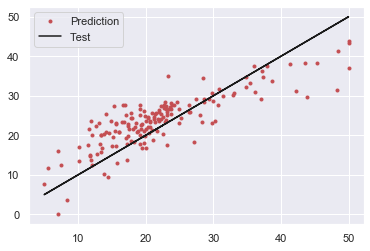

In [35]:
# Adapted from course materials
# Plotting the test values against the predicted values
plt.plot(y_test.values, y_predictedNP.T[0], 'r.', label='Prediction')

# Creating the straight line
plt.plot(y_test.values, y_test.values, 'k-', label='Test')

# Creating a legend
plt.legend()

# Showing the plot
plt.show()

### Evaluating the neural net

In [36]:
# Get the MSE
mse = model.evaluate(X_test, y_test) 
    
# Get the RMSE by getting the square root of the MSE
rmse = mse ** 0.5

# Viewing the RMSE
rmse

167/167 [==============================] - 0s 323us/step


5.315283907671319

## Improving the Neural Network

There are a number of steps we can take to improve the neural network. Below we will look at preprocessing the dataset as well as determining the best setting for the epochs and batch size.

### Preprocessing the dataset

#### Scaling the dataset

Machine learning algorithms can sometimes perform poorly if the dataset is not first standarized.[[21](#[21])] We can use the [sklearn](https://scikit-learn.org/stable/modules/preprocessing.html) StandardScaler function to scale the dataset. This removes the mean value from each feature and then divides by them by their standard deviation.[[21](#[21])]

In [37]:
# Adapted from course materials
import pandas as pd
import sklearn.preprocessing as pre
import numpy as np

# Initialize the scaler
scaler = pre.StandardScaler()
# Fit the scaler to the training input dataset
scaler.fit(X_train)

# Scale the train and test input datasets
scaled_X_train =  pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [38]:
# Viewing the scaled training input dataset
round(scaled_X_train.describe(), 2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
count,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00,339.00
mean,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.52,-1.54,-1.47,-3.77,-2.29,-1.26,-1.00,-1.29,-2.77,-3.83,-1.51,-0.26,-3.80
25%,-0.40,-0.52,-0.84,-0.91,-0.56,-0.87,-0.84,-0.66,-0.75,-0.52,0.21,-0.78,-0.26,0.26
50%,-0.38,-0.52,-0.34,-0.15,-0.12,0.32,-0.24,-0.54,-0.53,0.27,0.38,-0.23,-0.26,0.26
75%,-0.02,0.32,1.07,0.71,0.49,0.90,0.65,1.64,1.53,0.79,0.43,0.56,-0.26,0.26
max,8.92,3.71,2.49,2.89,3.47,1.16,3.67,1.64,1.80,1.63,0.44,3.56,3.80,0.26


#### Whitening the dataset

A dataset can be whitened by using Principal Components Analysis, which is used for dimensionality reduction.[[22](#[22])] Whitening the dataset will have the effect of uncorrelating the variables.[[23](#[23])]

In [39]:
# Adapted from course materials
import sklearn.decomposition as dec

# Create the PCA model that will whiten the input datasets
pca = dec.PCA(n_components=len(X_train.columns), whiten=True)

# Fit the model to the input training dataset
pca.fit(X_train)

# Create the whitened input datasets
whitened_X_train = pd.DataFrame(pca.transform(X_train), columns=X_train.columns)
whitened_X_test = pd.DataFrame(pca.transform(X_test), columns=X_test.columns)

In [40]:
# Viewing the whitened dataset
round(whitened_X_train.corr())

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_True,CHAS_False
CRIM,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
INDUS,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
NOX,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
RM,0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
AGE,-0.0,-0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
DIS,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
RAD,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
TAX,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0
PTRATIO,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0


#### Combining Whitening with Scaling

In [41]:
# Adapted from course materials
import sklearn.decomposition as dec

# Create the PCA model that will whiten the input datasets
pca = dec.PCA(n_components=len(scaled_X_train.columns), whiten=True)

# Fitting the PCA model to the Scaled dataset
pca.fit(scaled_X_train)

# Creating the scaled and whitened input datasets
whitenedAndScaled_X_train = pd.DataFrame(pca.transform(scaled_X_train), columns=scaled_X_train.columns)
whitenedAndScaled_X_test = pd.DataFrame(pca.transform(scaled_X_test), columns=scaled_X_test.columns)

### Creating a function for the machine learning algorithm

Next we can define a function that can pass the different preprocessed datasets to the neural network. It will then provide a graph with the RMSE at each epoch for the test and train datasets. The minimum RMSE and the epoch at which it occurred is also returned. The epoch and the batch size can also be altered with a call to the function. The y value for the plot can also be changed to give the best view on the graph.

In [42]:
# Function to predict the output values for XTest, evaluated against yTest using a neural network
# NeuralNet is trained on XTrain and yTrain
def neuralNet(XTrain, XTest, yTrain, yTest, plot_y_top, epoch_value, batch_value):
    # Importing packages
    from keras.models import Sequential
    from keras.layers import Dense

    # Determining the size of the input
    inputSize = len(XTrain.columns)
    
    # Defining the neural network
    model = Sequential()
    model.add(Dense(2*inputSize, input_dim=inputSize, activation='relu'))
    model.add(Dense(inputSize, activation='relu'))
    model.add(Dense(1, activation='relu'))

    # Compiling the neural net 
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    
    # Adapted from https://keras.io/visualization/
    # Fitting the neural net
    history = model.fit(XTrain, yTrain, epochs=epoch_value, validation_data=(XTest, yTest), batch_size=batch_value, verbose=0)
    
    # Plot training & validation loss values
    plt.figure(figsize=(12,6))
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.ylim(top=plot_y_top, bottom=0)
    plt.show()
    
    # Get the MSE
    mse = model.evaluate(XTest, yTest, verbose=0) 
    
    # Get the RMSE by getting the square root of the MSE
    rmse = mse ** 0.5

    epochForMinMSEValue = history.history['val_loss'].index(min(history.history['val_loss']))
    minMSEValue = min(history.history['val_loss'])
    
    return epochForMinMSEValue, minMSEValue**0.5

In our first call to the function we can input values similar to the model created above but have a much higher epochs value. We can see from below that we get a much better RMSE but the epoch at which this improved RMSE occurs is almost 20 times that of the original model above.

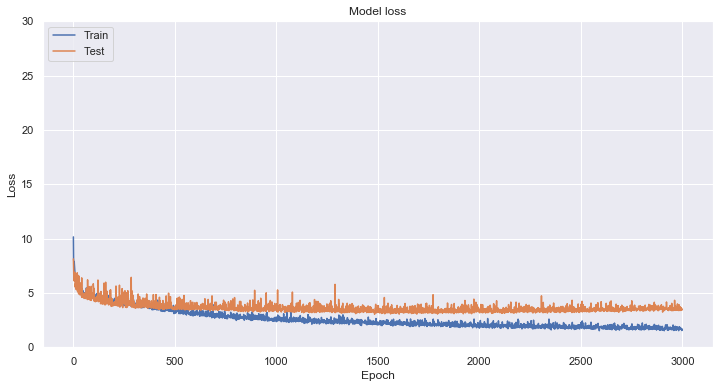

(1484, 3.039164952810091)

In [49]:
neuralNet(X_train, X_test, y_train, y_test, plot_y_top=30, epoch_value=3000, batch_value=4)

Next we have the scaled dataset. Here we can see that the epoch at which the lowest value for the RMSE occurs is around 70 times less that with the orginal non-preprocessed dataset. We can also clearly graph that the RMSE for the test dataset rises. This is due to overfitting of the training dataset. 

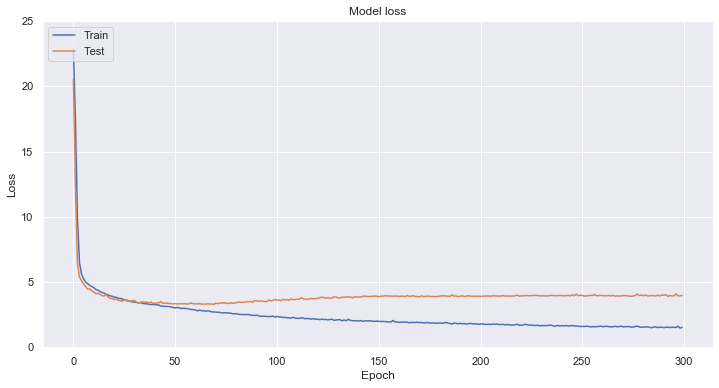

(69, 3.297117098861881)

In [44]:
neuralNet(scaled_X_train, scaled_X_test, y_train, y_test, plot_y_top=25, epoch_value=300, batch_value=4)

Next with the whitened dataset we have a similar RMSE to the scaled dataset but the epoch at which this occurs is almost 10 times higher.

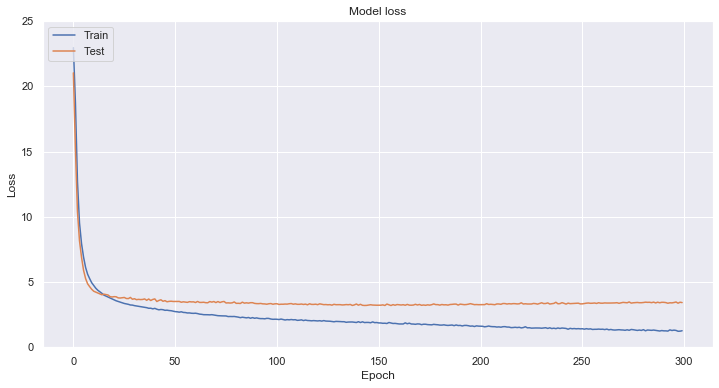

(156, 3.202643186273586)

In [45]:
neuralNet(whitened_X_train, whitened_X_test, y_train, y_test, plot_y_top=25, epoch_value=300, batch_value=4)

Next we can see that the dataset that has been both whitened and scaled performs worse compared to the whitened dataset in terms of the RMSE and the epoch at which this occurs. However, compared to the scaled only it appears to preform worse.

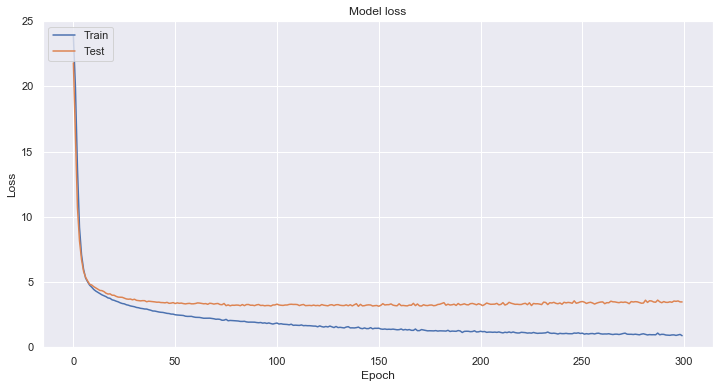

(140, 3.1418857569646628)

In [50]:
neuralNet(whitenedAndScaled_X_train, whitenedAndScaled_X_test, y_train, y_test, plot_y_top=25, epoch_value=300, batch_value=4)

As the whitened dataset appears to perform much better than the others, we can take a further look at this. We can try changing the batch size to see what effect this will have. Increasing the batch size will make the model fit faster but will reduce the RMSE. Setting the batch size to 124 gives us a RMSE that is worse than for a batch size of 4 above. The epoch at which this occurs is also much higher.

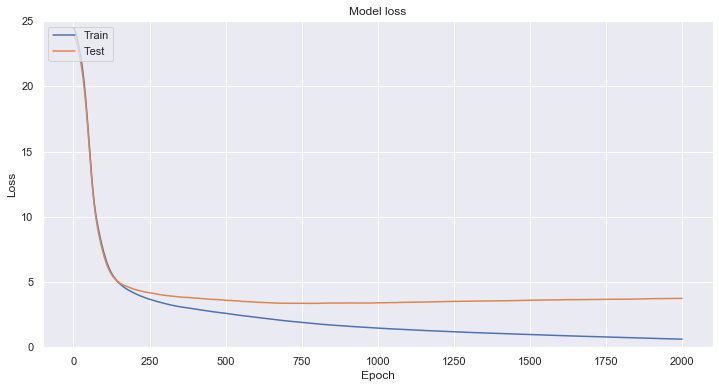

(789, 3.3650097383750475)

In [47]:
neuralNet(whitened_X_train, whitened_X_test, y_train, y_test, plot_y_top=25, epoch_value=2000, batch_value=124)

Setting the batch size to only 1 gives us a much better output for the RMSE. The epoch at which this occurs is much lower but it will take the model longer to fit with a batch size that is this low.

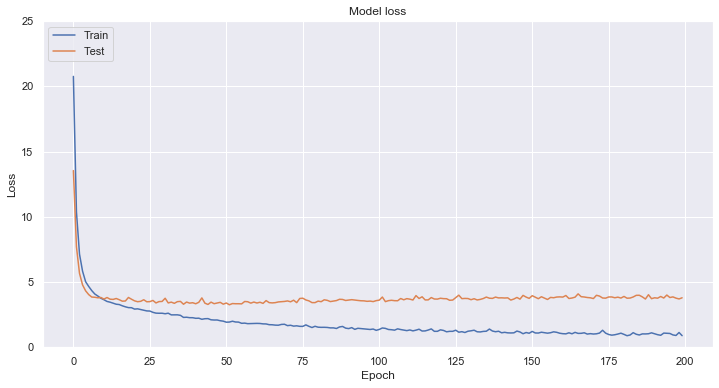

(51, 3.2597941819378824)

In [48]:
neuralNet(whitened_X_train, whitened_X_test, y_train, y_test, plot_y_top=25, epoch_value=200, batch_value=1)

The neuralNet function could be improved further by giving the time to get the lowest RMSE as well as providing extra parameters such as the optimiser or the dimensions for the various layers. Combining this with a genetic algorithm that would chose at random different inputs and refine based on what gives the best output could make further improvements. A great example of combining a neural network with a genetic algroithm can be found on [Towards Data Science](https://towardsdatascience.com/gas-and-nns-6a41f1e8146d).

# Conclusion

In this notebook we have used descriptive and inferential statistics as well as machine learning to analyse the Boston House Prices dataset. 

In the descriptive statistics section we have seen how the different attributes compared with each other in terms of there distributions and their summary statistics. We also looked at how they correlated with each other. We noticed from this that there was a very low correlation between the median house prices for houses along the Charles River and those that are not. 

In the next section, we used inferential statistics to examine this relationship further. We found that there is a strong likelyhood that there is a link between higher median house prices for house along the Charles River compared to those that are not. 

Finally, we used the Keras package to construct a neural network which we used to predict the median house prices given the remaining attributes from the dataset as input. We found that preprocessing the dataset produced a lower RMSE and did so using less epochs. We also saw how choosing the correct number of epochs to use when fitting the model would prevent both over and under fitting the model to the training dataset.

# References

<a name="[1]"></a>[1] Cite Seer X. Hedonic Housing Prices and the Demand for Clean Air. [http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.926.5532&rep=rep1&type=pdf]

<a name="[2]"></a>[2] Towards Data Science. Inferential Statistics for Data Science. [https://towardsdatascience.com/inferential-statistics-for-data-science-b0075670fc8a]

<a name="[3]"></a>[3] Science Direct. Inferential Statistics. [https://www.sciencedirect.com/topics/medicine-and-dentistry/inferential-statistics]

<a name="[4]"></a>[4] Investopedia. T-Test. [https://www.investopedia.com/terms/t/t-test.asp]

<a name="[5]"></a>[5] Wikipedia. Student's t-test. [https://en.wikipedia.org/wiki/Student%27s_t-test]

<a name="[6]"></a>[6] Step by Step Solutions: T-tests: Paired/Dependent and Independent. RPubs. [https://rpubs.com/raquelsbf/t-tests]

<a name="[7]"></a>[7] Wikipedia. Student's t-test. [https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test]

<a name="[8]"></a>[8] Wikipedia. Welch's t-test. [https://en.wikipedia.org/wiki/Welch%27s_t-test]

<a name="[9]"></a>[9] Towards Data Science. Linear Regression on Boston Housing Dataset. [https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155]

<a name="[10]"></a>[10] University of Minnesota. Types of Statistical Test. [https://cyfar.org/types-statistical-tests]

<a name="[11]"></a>[11] Machine Learning Mastery. How to Choose Loss Functions When Training Deep Learning Neural Networks. [https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/]

<a name="[12]"></a>[12] Wikipedia. Keras. [https://en.wikipedia.org/wiki/Keras]

<a name="[13]"></a>[13] Wikipedia. Neuron. [https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png "Neuron"] 

<a name="[14]"></a>[14] Skymind. A Beginner's Guide to Neural Networks and Deep Learning. [https://skymind.ai/wiki/neural-network]

<a name="[15]"></a>[15] Wikipedia. Artificial neural network. [https://en.wikipedia.org/wiki/Artificial_neural_network]

<a name="[16]"></a>[16] Skymind. A Beginner's Guide to Neural Networks and Deep Learning. [https://skymind.ai/wiki/neural-network]

<a name="[17]"></a>[17] Wikipedia. Neural Network. [https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/296px-Colored_neural_network.svg.png "Neural Network"]

<a name="[18]"></a>[18] Medium. A Practical Guide to ReLU. [https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7]

<a name="[19]"></a>[19] Statistics How To. Mean Square Error. [https://www.statisticshowto.datasciencecentral.com/mean-squared-error/]

<a name="[20]"></a>[20] Vernier. What are Mean Squared Error and Root Mean Squared Error? [https://www.vernier.com/til/1014/]

<a name="[21]"></a>[21] Scikit Learn. Preprocessing data. [https://scikit-learn.org/stable/modules/preprocessing.html]

<a name="[22]"></a>[22] Stanford University. PCA Whitening. [http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/]

<a name="[23]"></a>[23] Wikipedia. Whitening transformation. [https://en.wikipedia.org/wiki/Whitening_transformation]